# Use Case 1: Small Radial Grid

Developed by Mike Bardwell. University of Alberta. 2018

In [1]:
# imports
import keras
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

import sys; sys.path.append('../'); sys.path.append('../../')
from powerflowsim import PowerFlowSim

Using TensorFlow backend.
C:\Users\mikey\Anaconda3\envs\microgrid_workcomp\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\mikey\Anaconda3\envs\microgrid_workcomp\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# model filename
topology = 'radial'
number_of_houses = 10
number_of_timestamps = 1000
model_name = topology + '_10houses_' + str(number_of_timestamps) + 'timestamps'

In [3]:
# load dnn model
model_file = model_name + '.json'
model_json = ''
with open(model_file, 'r') as json_file:
    for line in json_file:
        model_json += line
model = model_from_json(model_json)

In [4]:
# re-initialise dnn model with the correct weights
weight_file = model_name + '.h5'
model.load_weights(weight_file, by_name=False)

In [5]:
# prepare load profiles
pfs = PowerFlowSim(number_of_timestamps, topology,  '../_configs/montecarlo10.json')
pfs.nrPfSim()

load_profile = []
for agent in pfs.sim.participants:
    if agent.devices['load'] == None:
        continue
    else:
        load_profile.append(agent.devices['load'].offline_profile['profile'])
load_profile = np.array(load_profile).T

C:\Users\mikey\Anaconda3\envs\microgrid_workcomp\lib\site-packages\pypsa\components.py:758: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  keys=self.passive_branch_components)


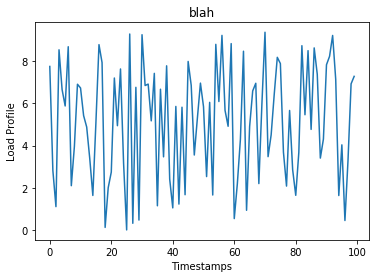

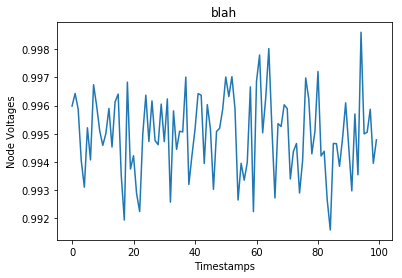

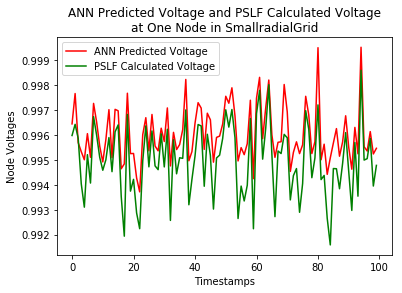

In [6]:
predictions = model.predict(load_profile)
x_axis = [i for i in range(100)]

# Load profile
plt.plot(x_axis, load_profile.T[1][0:len(x_axis)])
plt.xlabel('Timestamps')
plt.ylabel('Load Profile')
plt.title('blah')
plt.show()

# PSLF voltage plot
pslf_data = pfs.plotNodeVoltages(node = 1, no_timestamps = len(x_axis))

# ANN voltage plot
plt.plot(x_axis, predictions.T[1][0:len(x_axis)], 'r', x_axis, pslf_data, 'g') 
plt.xlabel('Timestamps')
plt.ylabel('Node Voltages')
plt.legend(['ANN Predicted Voltage', 'PSLF Calculated Voltage'])

from textwrap import wrap
title = 'ANN Predicted Voltage and PSLF Calculated Voltage at One Node in Small' + topology + 'Grid'
plt.title('\n'.join(wrap(title,50)))
plt.savefig('usecase_' + str(number_of_houses) + 'houses_' + topology + 'grid.pdf', transparent = True)

plt.show()